In [70]:
import glob
import pandas as pd
import numpy.fft as fft
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [12]:
def timestamper(timestamp):
    return datetime.datetime.fromtimestamp(float(timestamp)/1000)

In [18]:
off_files = ['data/raw/IOT.TB01.2017-05-15.13:48:28.csv','data/raw/IOT.TB01.2017-05-14.19:31:46.csv']
normal_files = ['data/raw/IOT.TB01.2017-05-16.15:51:02.csv', 'data/raw/IOT.TB01.2017-05-15.13:33:10.csv']
anomaly_files = ['data/raw/IOT.TB01.2017-05-14.17:27:12.csv', 'data/raw/IOT.TB01.2017-05-14.19:16:20.csv']

# Data as independent instants
Using each file as an independent sample, we can calculate FFT on each file and don't mind about the time dependency of the files
## Motor off

filename: data/raw/IOT.TB01.2017-05-15.13:48:28.csv


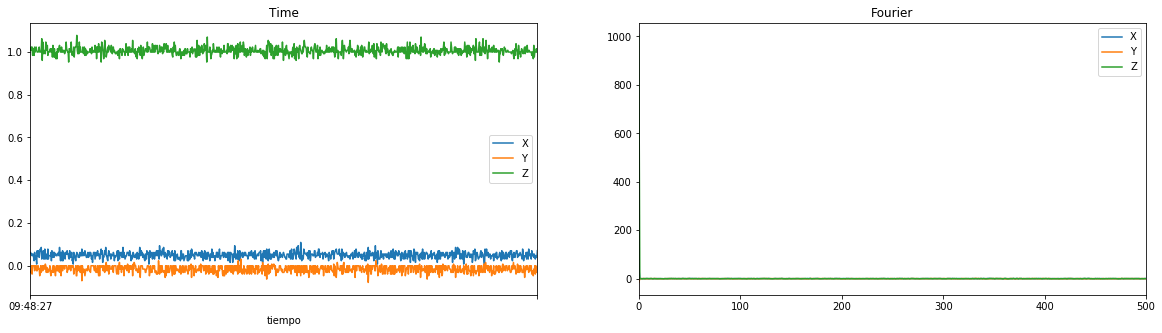

,X,Y,Z,Mean
Fourier-mean,0.012511,-0.016318,0.009594,0.001929
Fourier-std,0.343412,0.359832,0.396328,0.366524
Time-mean,0.050279,-0.015678,1.004593,0.346398
Time-std,0.014797,0.016099,0.017832,0.016243


filename: data/raw/IOT.TB01.2017-05-14.19:31:46.csv


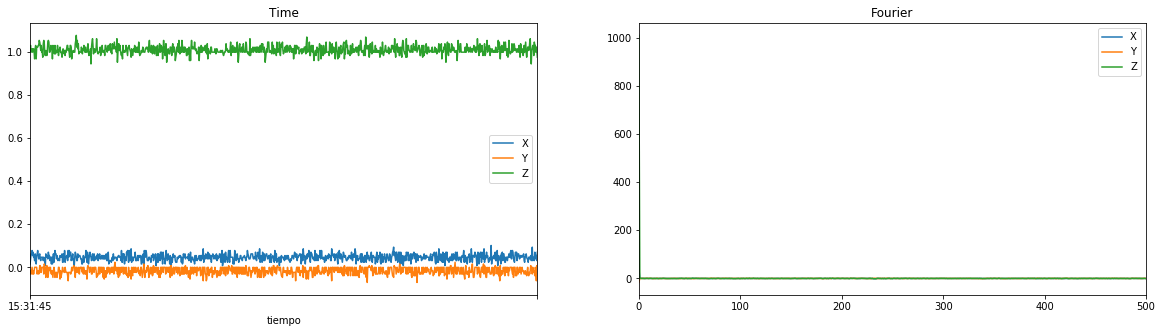

,X,Y,Z,Mean
Fourier-mean,-0.030779,0.000234,0.012152,-0.006131
Fourier-std,0.338878,0.365962,0.427983,0.377608
Time-mean,0.046433,-0.016637,1.008938,0.346245
Time-std,0.015738,0.016450,0.019544,0.017244


In [38]:
for file in off_files:
    df = pd.read_csv(file,index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Time")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.legend()
    plt.show()
    
    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

When the motor is off we can see that the series in the time domain is only white noise, and has a constant mean and standard deviation close to 0. 

In the fourier domain we doesn't see any other spike than the first one (maybe the one that models the white noise process).

## Normal behavior

filename: data/raw/IOT.TB01.2017-05-16.15:51:02.csv


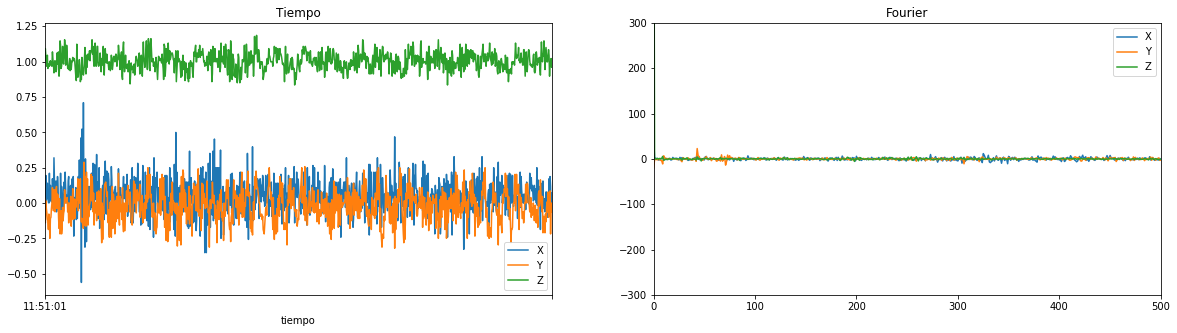

,X,Y,Z,Mean
Fourier-mean,-0.021512,0.049234,0.002512,0.010078
Fourier-std,2.785166,2.427526,1.206675,2.139789
Time-mean,0.051761,-0.020506,1.003072,0.344776
Time-std,0.122607,0.111320,0.061965,0.098631


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


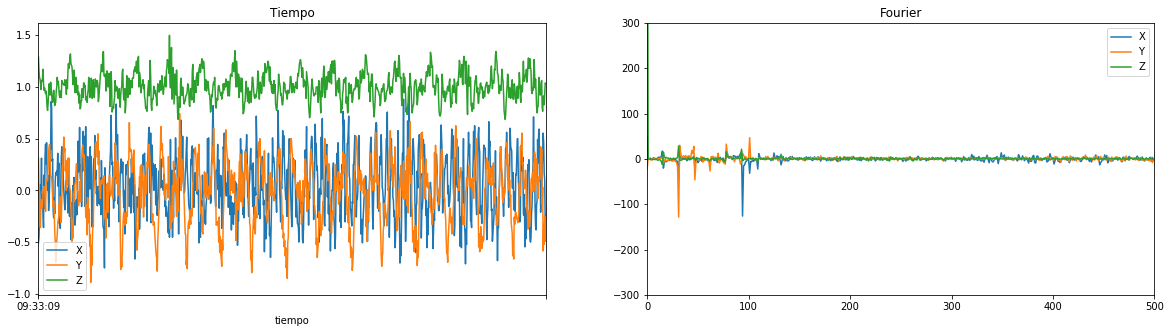

,X,Y,Z,Mean
Fourier-mean,-0.562084,0.335665,0.280691,0.018091
Fourier-std,7.565086,7.697819,2.583639,5.948848
Time-mean,0.050552,-0.021590,1.007027,0.345329
Time-std,0.296895,0.297878,0.126472,0.240415


In [41]:
for file in normal_files:
    df = pd.read_csv(file,index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Tiempo")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.ylim([-300,300])
    plt.legend()
    plt.show()

    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

We can see that the Fourier domain plot has a lot more spikes other than the first one, but the spikes are smaller than a 200, and the standard deviation is small.

## Abnormal Behavior 

filename: data/raw/IOT.TB01.2017-05-14.17:27:12.csv


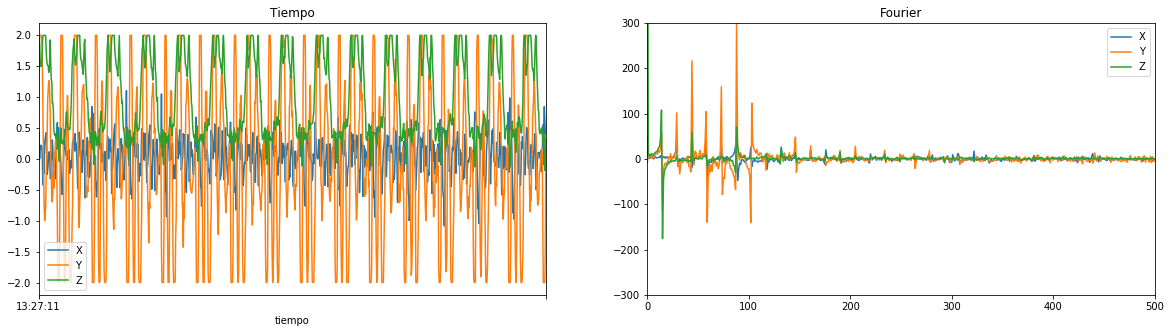

,X,Y,Z,Mean
Fourier-mean,0.182848,0.518115,0.750173,0.483712
Fourier-std,6.515387,24.910268,11.478655,14.301437
Time-mean,0.051285,-0.008276,0.996193,0.346401
Time-std,0.309759,1.267768,0.660220,0.745916


filename: data/raw/IOT.TB01.2017-05-14.19:16:20.csv


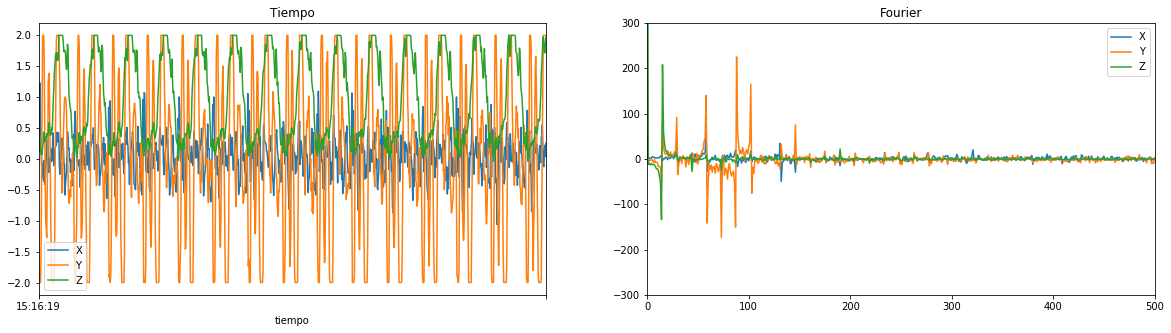

,X,Y,Z,Mean
Fourier-mean,0.793541,-1.167457,-0.653601,-0.342506
Fourier-std,6.985338,22.380982,12.503310,13.956543
Time-mean,0.051168,0.007562,0.972882,0.343871
Time-std,0.321812,1.276645,0.690883,0.763113


In [40]:
for file in anomaly_files:
    df = pd.read_csv(file,index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Tiempo")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.ylim([-300,300])
    plt.legend()
    plt.show()

    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

We can see a lot more caothic series in the time domain, and bigger spikes in the Fourier domain. Also the standard deviantion is a lot higher than the normal one.

# Data as Time Series
Instead of using each file separetly, calculate the mean, standard deviantion and other statistical values and use them as a multivariate time series.

Using the assumption that each measurement is done every ~30s, we filter the data with gaps and get an continous time series.

In [122]:
df_filtered = pd.read_csv("data/filtered_statistics.csv",index_col="time")
df_filtered.index = pd.to_datetime(df_filtered.index)

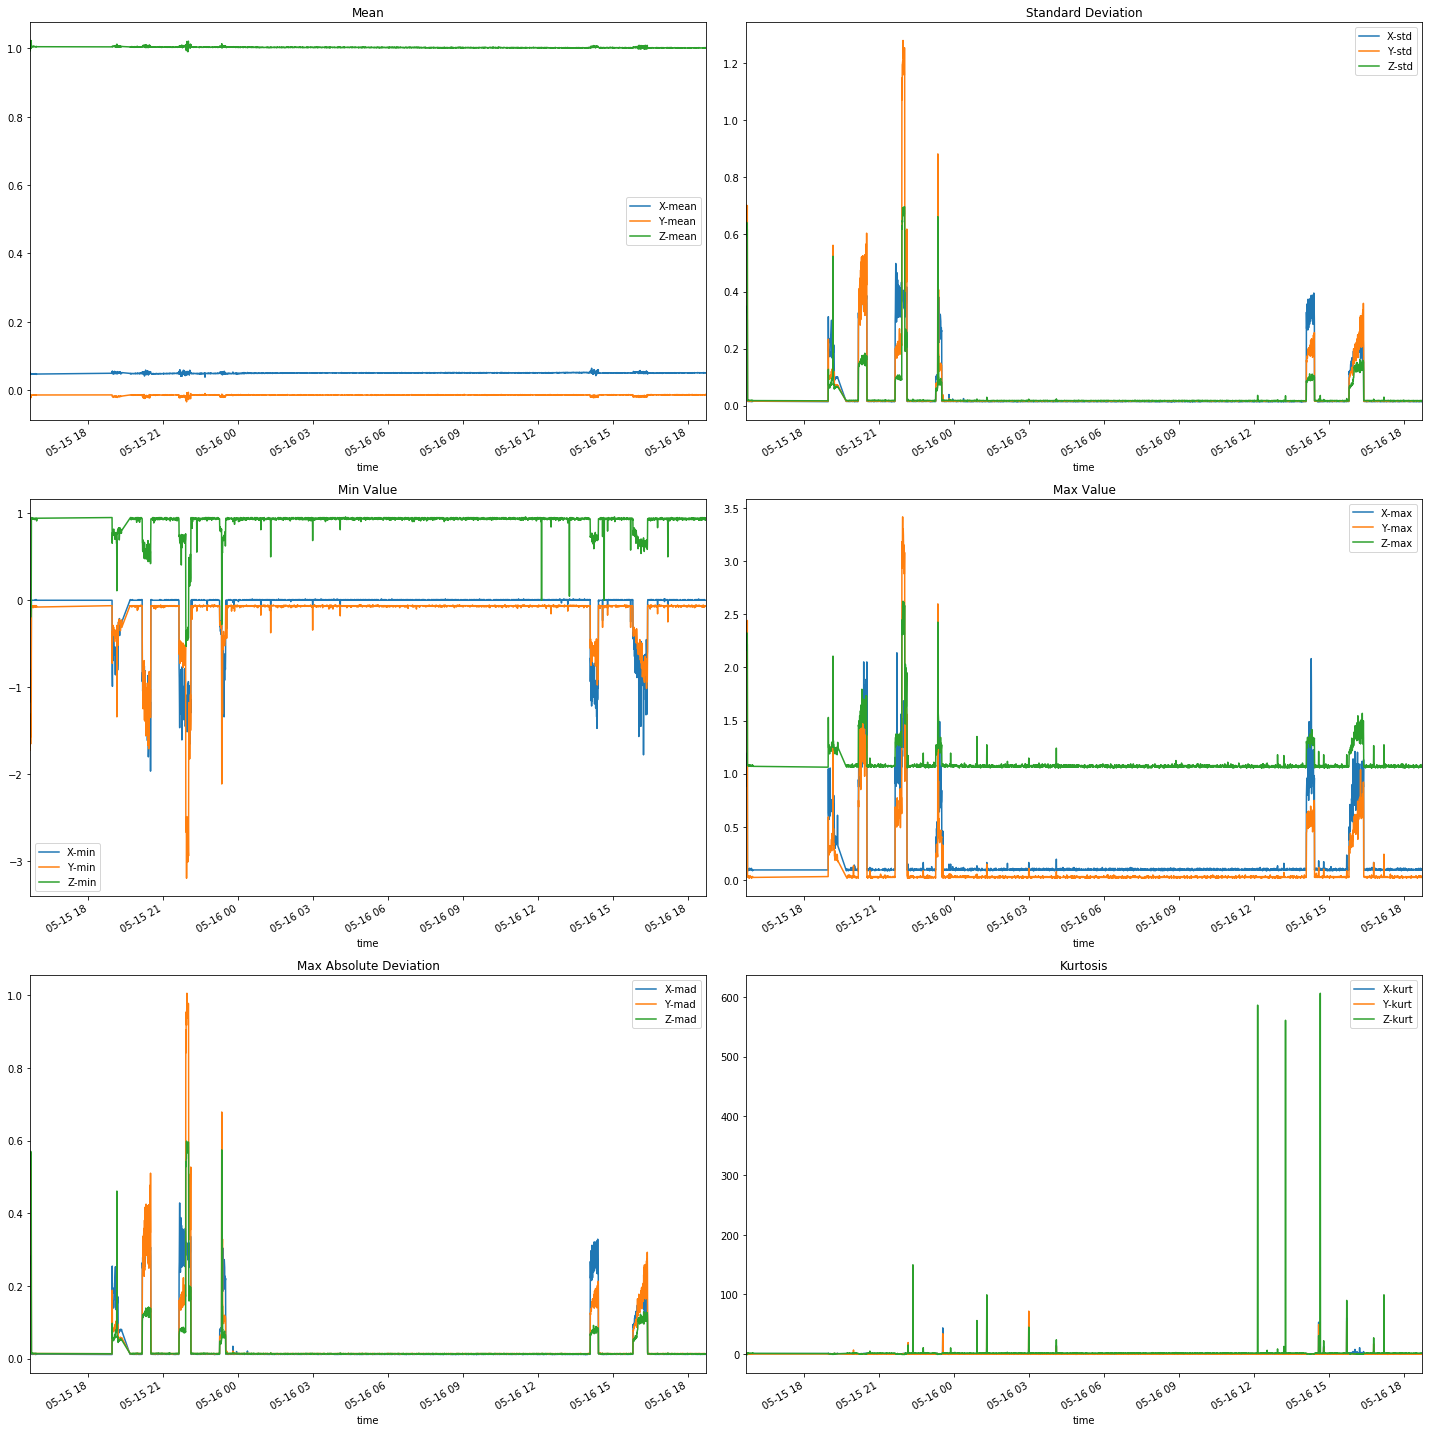

In [123]:
fig,ax = plt.subplots(3,2, figsize=(20,20))
ax = ax.ravel()
df_filtered[["X-mean","Y-mean","Z-mean"]].plot( title="Mean",ax=ax[0])
df_filtered[["X-std","Y-std","Z-std"]].plot( title="Standard Deviation",ax=ax[1])
df_filtered[["X-min","Y-min","Z-min"]].plot( title="Min Value",ax=ax[2])
df_filtered[["X-max","Y-max","Z-max"]].plot(title="Max Value",ax=ax[3])
df_filtered[["X-mad","Y-mad","Z-mad"]].plot(title="Max Absolute Deviation",ax=ax[4])
df_filtered[["X-kurt","Y-kurt","Z-kurt"]].plot(title="Kurtosis",ax=ax[5])
plt.tight_layout()
plt.show()

The most information in the first analysis is the Mean and standard deviation, the min, max and mean absolute deviation give the same information as the standard deviation.

The Kurtosis can give more information, but with mean and std we can make a good dataset.

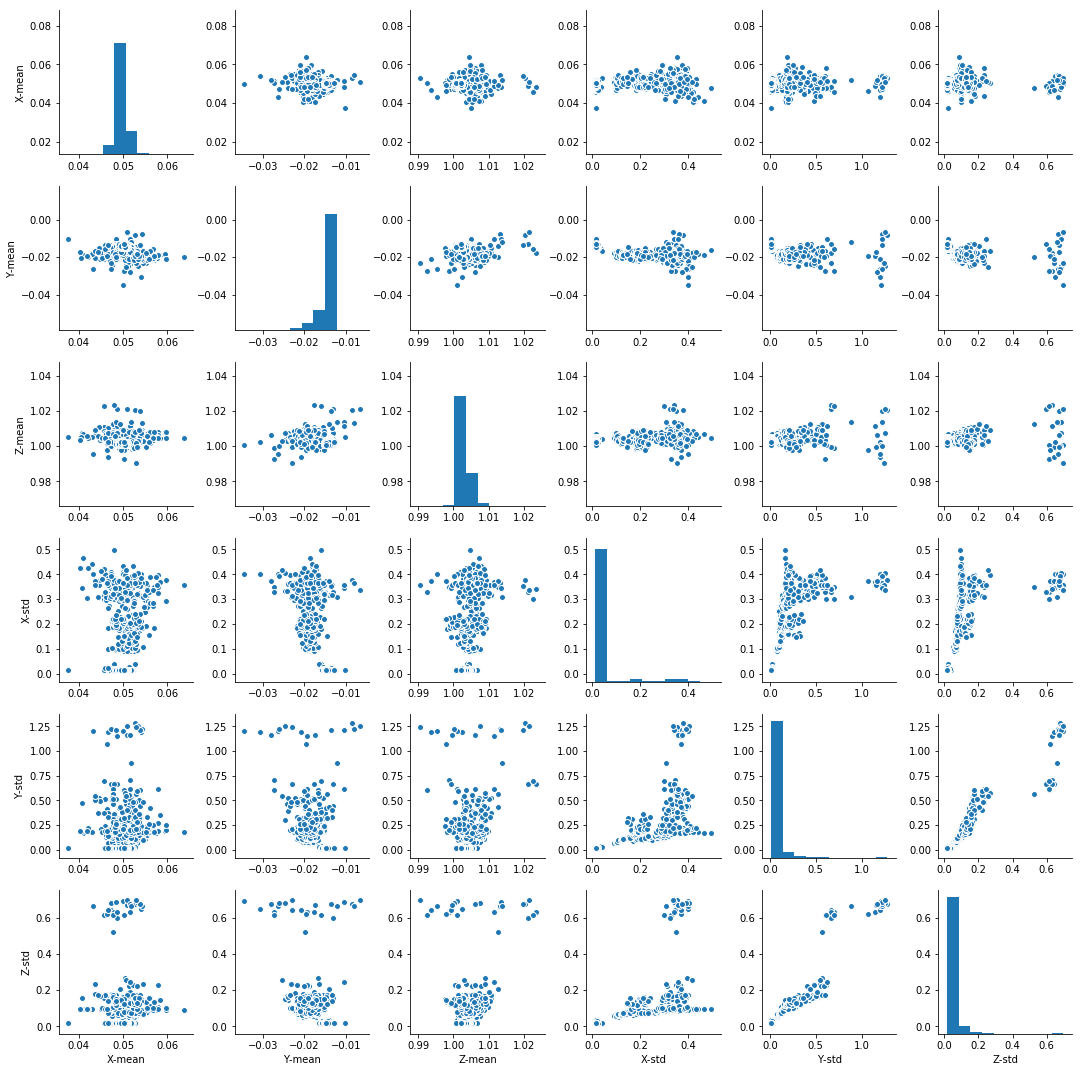

In [126]:
sns.pairplot(df_filtered[["X-mean","Y-mean","Z-mean","X-std","Y-std","Z-std"]])

## Just for Fun using clustering to predict the anomalies

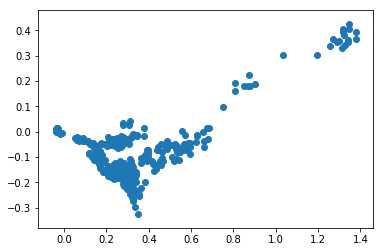

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca_data = pca.fit_transform(df_filtered[["X-mean","Y-mean","Z-mean","X-std","Y-std","Z-std"]].values)
plt.scatter(pca_data[:,0], pca_data[:,1])

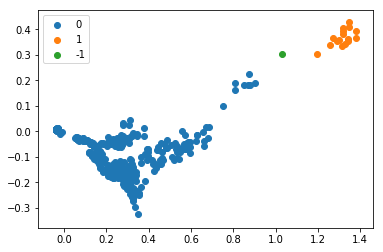

In [146]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
clustering = DBSCAN(eps=0.15)

labels = clustering.fit_predict(pca_data)
unique_labels = set(labels)

n_max = len(pca_data)
for k in unique_labels:
    xy = pca_data[labels == k]
    plt.scatter(xy[:,0], xy[:,1])
    if k != -1:
        n = len(xy)
        if n < n_max:
            n_max = n
            small_cluster = k
plt.legend(unique_labels)
        
possible_dates = df_filtered.index[labels == 1]

filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


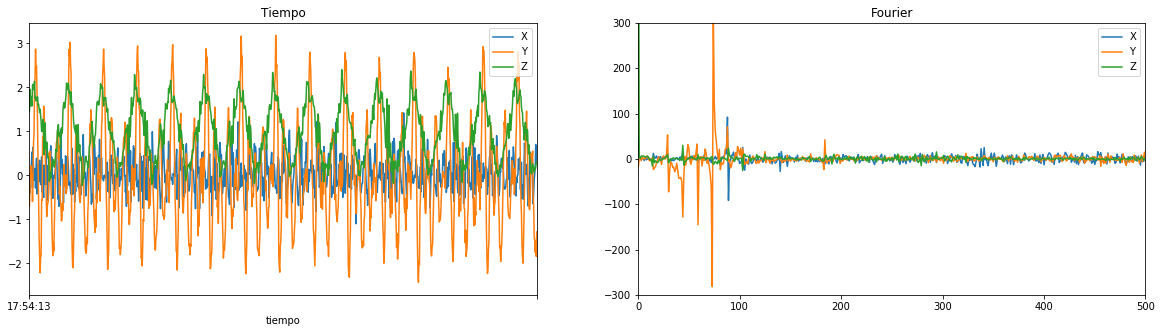

,X,Y,Z,Mean
Fourier-mean,0.000484,-0.680472,0.443149,-0.078946
Fourier-std,8.964580,24.736260,4.184442,12.628428
Time-mean,0.048578,-0.019367,1.011403,0.346871
Time-std,0.369593,1.148329,0.630963,0.716295


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


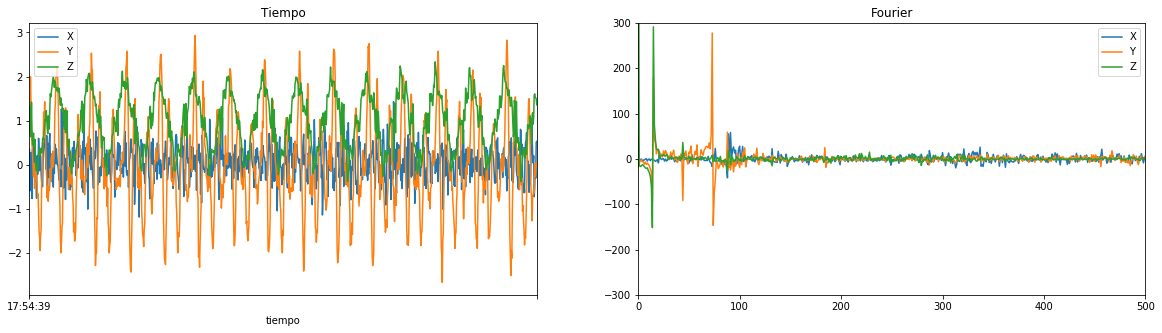

,X,Y,Z,Mean
Fourier-mean,0.303389,0.768472,0.328942,0.466934
Fourier-std,8.144584,19.730344,16.434674,14.769867
Time-mean,0.046465,-0.019640,0.997745,0.341523
Time-std,0.372491,1.071966,0.618685,0.687714


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


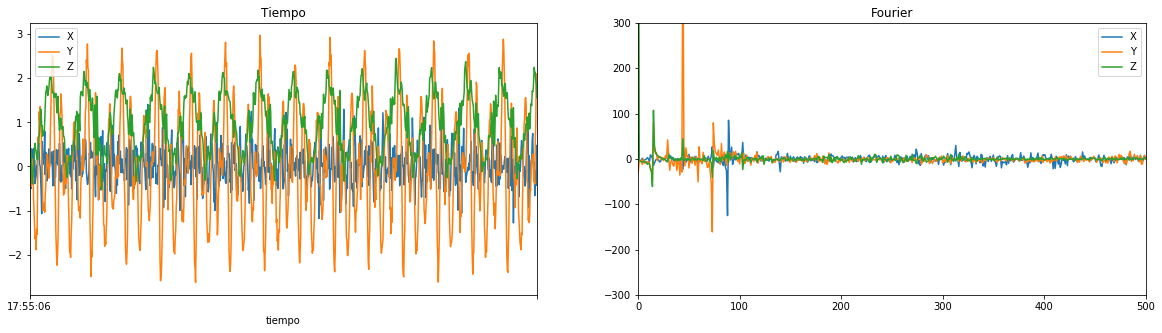

,X,Y,Z,Mean
Fourier-mean,-0.366912,-0.554190,-0.266479,-0.395860
Fourier-std,9.946697,25.880994,7.626975,14.484888
Time-mean,0.054109,-0.030599,1.002511,0.342007
Time-std,0.402391,1.195659,0.648793,0.748948


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


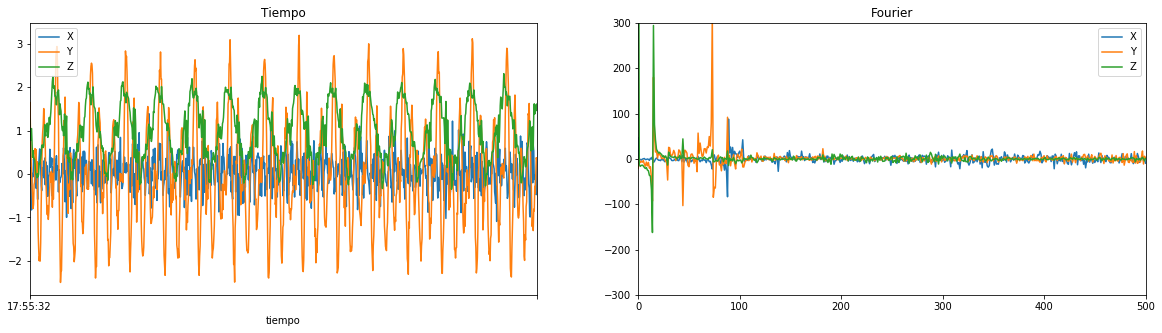

,X,Y,Z,Mean
Fourier-mean,-0.305698,1.520579,0.270878,0.495253
Fourier-std,9.273229,21.065482,16.883912,15.740874
Time-mean,0.046652,-0.020873,0.993619,0.339799
Time-std,0.371147,1.196727,0.643201,0.737025


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


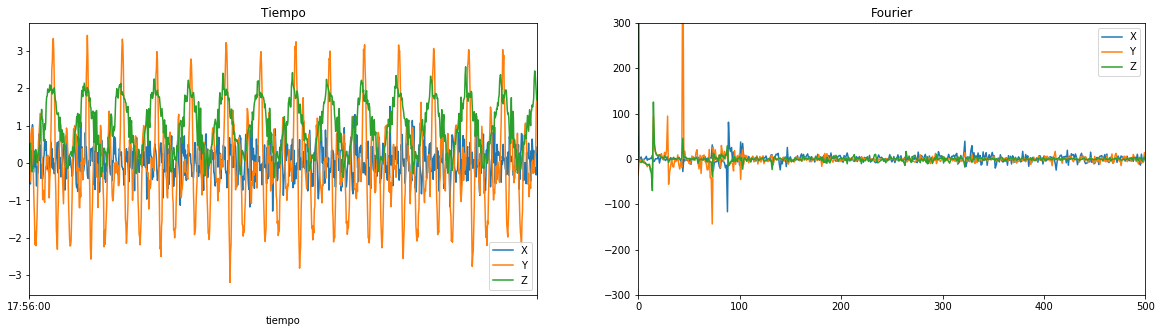

,X,Y,Z,Mean
Fourier-mean,0.432947,-0.297258,-0.527436,-0.130582
Fourier-std,10.071142,26.448959,8.668919,15.063007
Time-mean,0.050021,-0.034609,1.000857,0.338757
Time-std,0.400065,1.206351,0.694093,0.766836


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


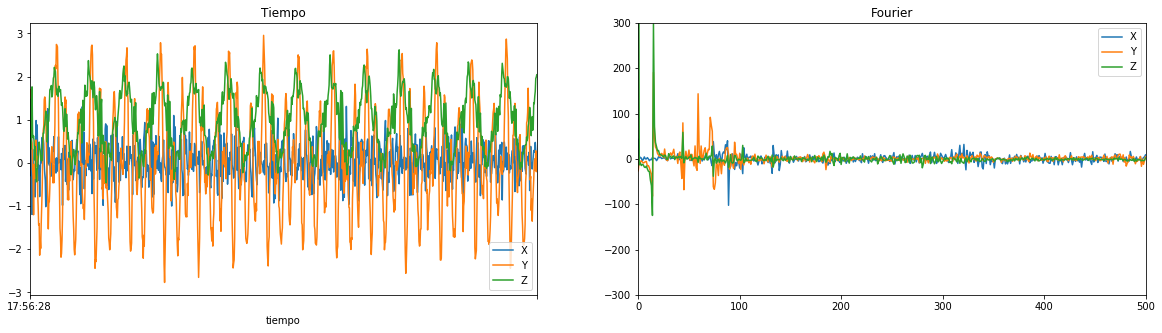

,X,Y,Z,Mean
Fourier-mean,0.191693,1.138348,-0.346133,0.327969
Fourier-std,9.404990,16.648024,16.670337,14.241117
Time-mean,0.043321,-0.026309,0.995335,0.337449
Time-std,0.401484,1.205123,0.665126,0.757244


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


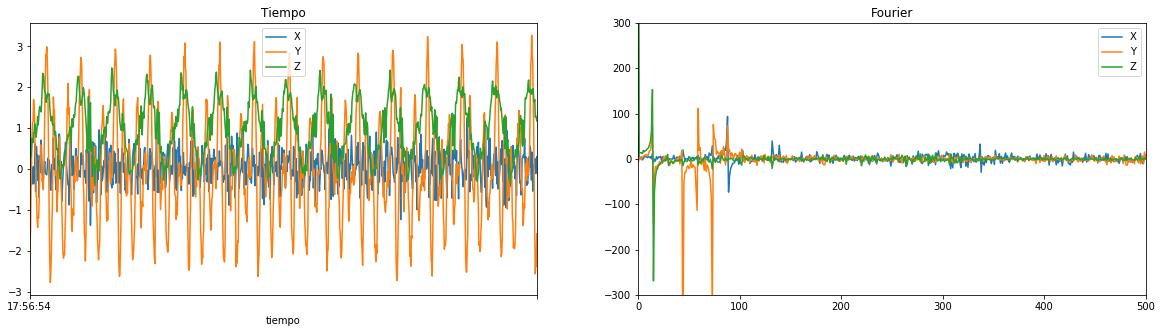

,X,Y,Z,Mean
Fourier-mean,0.962333,-2.369125,-1.083404,-0.830066
Fourier-std,9.423352,29.810401,15.606488,18.280080
Time-mean,0.052775,-0.008455,1.020497,0.354939
Time-std,0.378443,1.279995,0.677620,0.778686


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


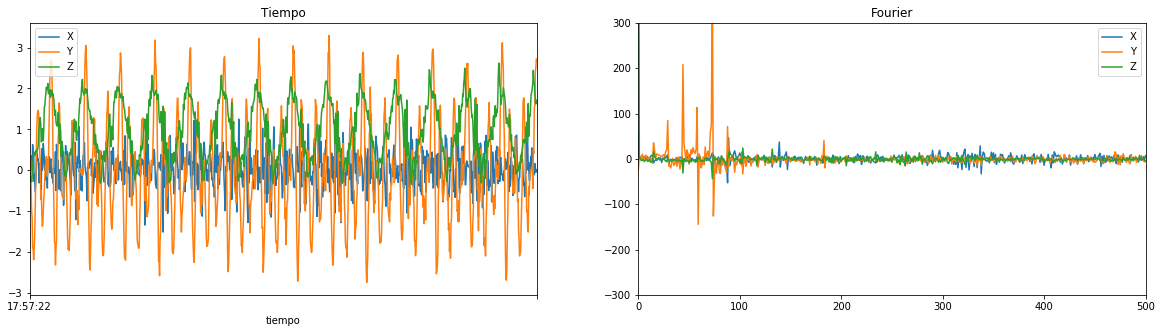

,X,Y,Z,Mean
Fourier-mean,0.062837,0.066347,-1.058226,-0.309681
Fourier-std,8.002277,25.096523,5.030873,12.709891
Time-mean,0.053461,-0.024734,1.007682,0.345470
Time-std,0.404787,1.258461,0.683713,0.782320


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


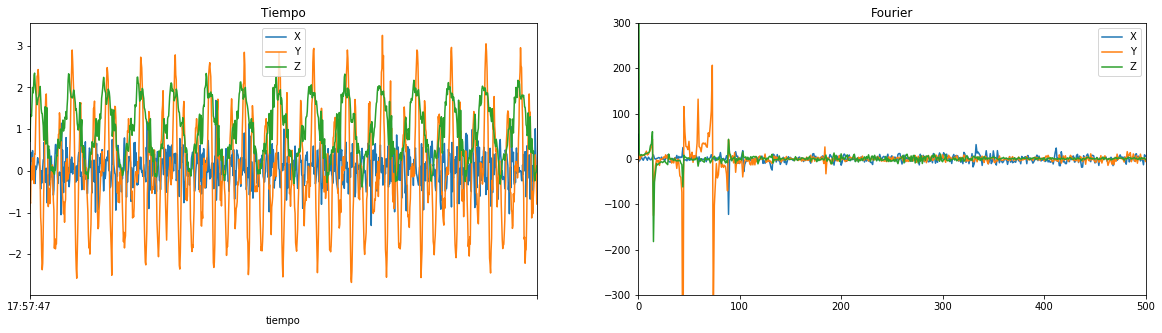

,X,Y,Z,Mean
Fourier-mean,-0.212659,-0.972660,-0.023899,-0.403073
Fourier-std,8.812557,35.207707,10.774945,18.265070
Time-mean,0.054257,-0.007956,1.013119,0.353140
Time-std,0.362726,1.218451,0.666831,0.749336


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


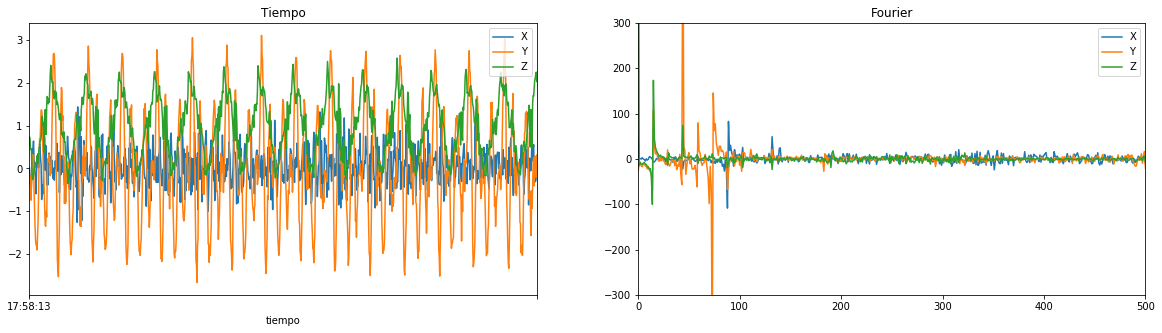

,X,Y,Z,Mean
Fourier-mean,-0.049733,-0.228618,-0.272626,-0.183659
Fourier-std,9.673492,36.207018,11.157417,19.012642
Time-mean,0.047245,-0.026177,1.000233,0.340434
Time-std,0.391449,1.223923,0.678750,0.764707


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


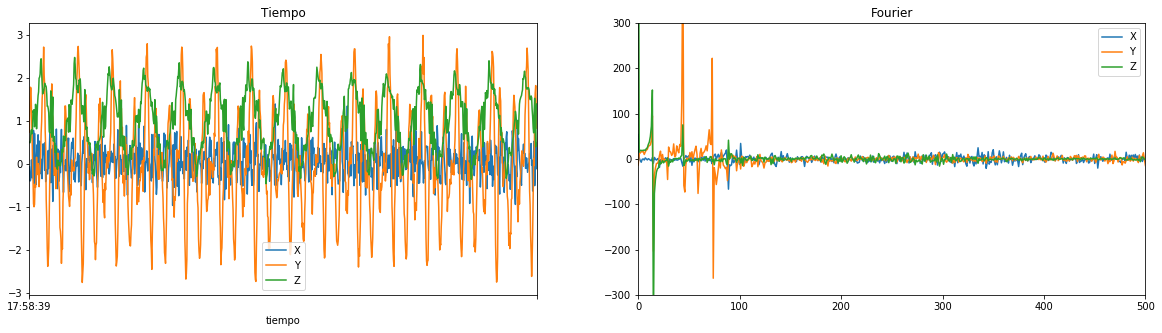

,X,Y,Z,Mean
Fourier-mean,-0.121867,0.739643,-0.522522,0.031751
Fourier-std,7.590794,31.653559,20.605971,19.950108
Time-mean,0.053898,-0.013463,1.019803,0.353413
Time-std,0.351864,1.216668,0.674675,0.747736


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


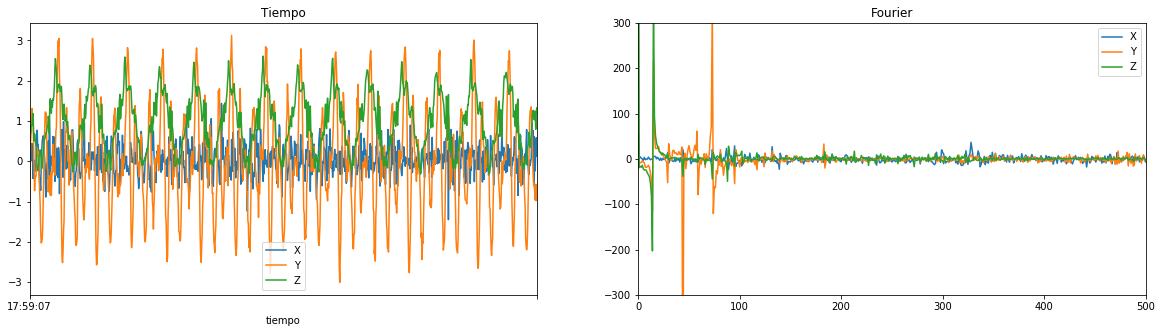

,X,Y,Z,Mean
Fourier-mean,-0.675698,-1.242072,0.270161,-0.549203
Fourier-std,6.736567,33.478325,21.055846,20.423579
Time-mean,0.052892,-0.022885,0.990327,0.340111
Time-std,0.355189,1.244696,0.695961,0.765282


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


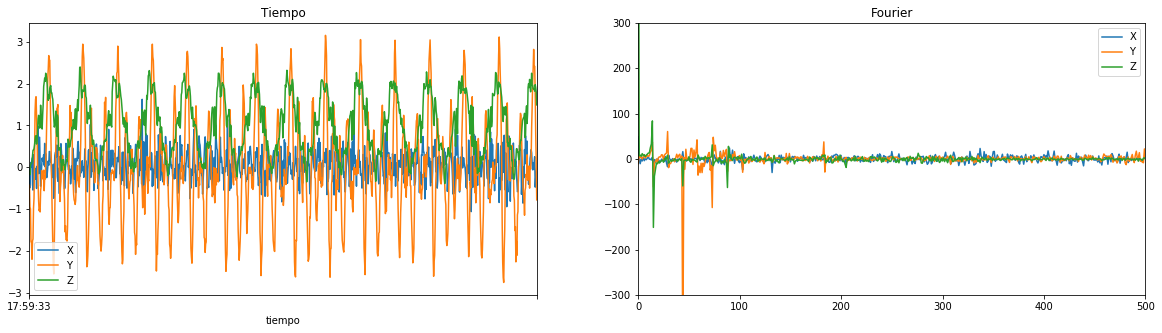

,X,Y,Z,Mean
Fourier-mean,-0.085706,-0.415069,-1.115010,-0.538595
Fourier-std,6.566456,22.552873,10.054703,13.058011
Time-mean,0.048500,-0.010499,1.013532,0.350511
Time-std,0.343178,1.217318,0.687353,0.749283


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


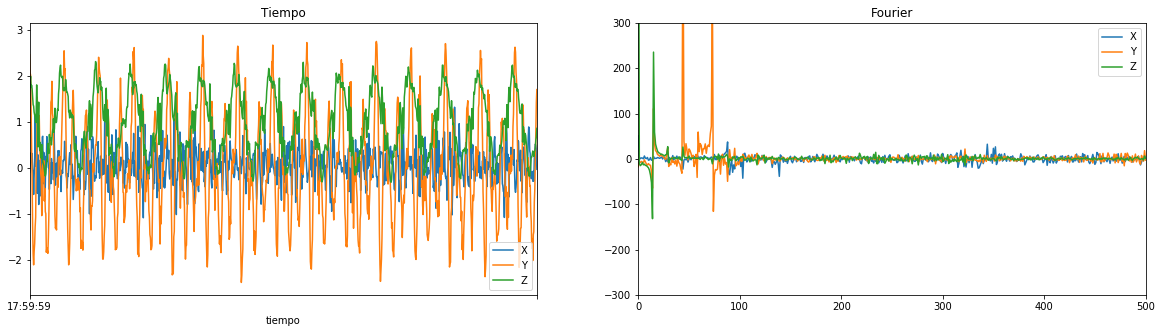

,X,Y,Z,Mean
Fourier-mean,-0.140182,2.471586,0.686634,1.006013
Fourier-std,7.605336,32.585490,13.738045,17.976290
Time-mean,0.050887,-0.017339,0.999703,0.344417
Time-std,0.356658,1.158211,0.670745,0.728538


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


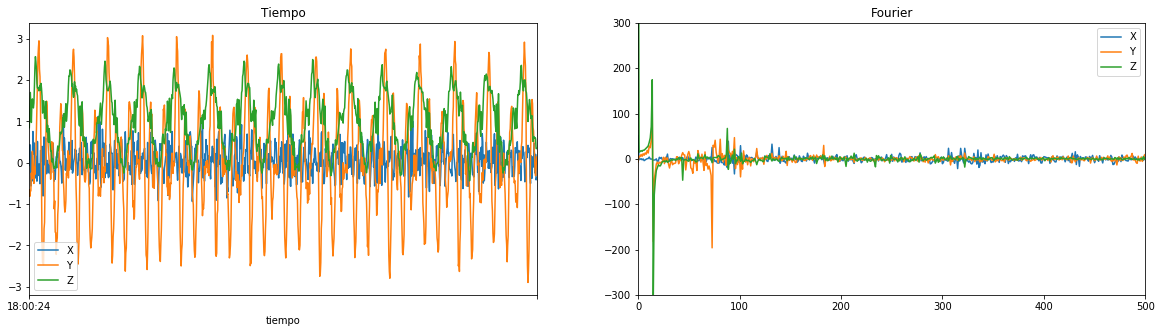

,X,Y,Z,Mean
Fourier-mean,-0.104255,-0.638586,-0.168854,-0.303898
Fourier-std,6.788067,15.687669,18.151399,13.542378
Time-mean,0.050981,-0.006630,1.021394,0.355248
Time-std,0.338293,1.254595,0.697520,0.763469


filename: data/raw/IOT.TB01.2017-05-15.13:33:10.csv


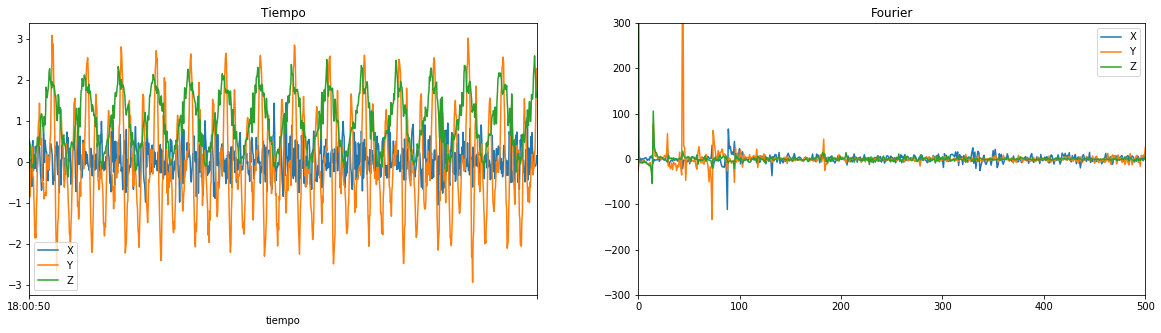

,X,Y,Z,Mean
Fourier-mean,0.211957,-0.141508,-0.485550,-0.138367
Fourier-std,9.569120,26.327676,6.921901,14.272899
Time-mean,0.051675,-0.028010,1.006145,0.343270
Time-std,0.374020,1.166134,0.675171,0.738442


In [147]:
for date in possible_dates:
    df = pd.read_csv("data/raw/IOT.TB01."+str(date).replace(" ",".")+".csv",index_col="tiempo", parse_dates=True, date_parser=timestamper)
    df_fft = {}
    for column in df.columns:
        df_fft[column] = fft.rfft(df[column]).real
    df_fft = pd.DataFrame(df_fft)
    
    print("filename: {}".format(file))
    fig,ax = plt.subplots(1,2, figsize=(20,5))
    df.plot(ax=ax[0], title="Tiempo")
    df_fft.plot(ax=ax[1], title="Fourier")
    plt.ylim([-300,300])
    plt.legend()
    plt.show()

    stats = {}
    stats["Time-mean"] = df.mean()
    stats["Time-std"] = df.std()
    stats["Fourier-mean"] = df_fft.iloc[1:].mean()
    stats["Fourier-std"] = df_fft.iloc[1:].std()
    stats = pd.DataFrame(stats).transpose()
    stats["Mean"] = stats.mean(axis=1)
    display(stats)

Just an idea but getting some interesting results